reference: https://www.kaggle.com/kcbighuge/predicting-sales-with-a-nested-lstm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/kaggle/team_sales_train.csv')
items_df = pd.read_csv('/content/drive/My Drive/kaggle/team_items.csv')
test_df = pd.read_csv('/content/drive/My Drive/kaggle/team_test.csv')


In [ ]:
# items_df.drop('item_name', axis=1, inplace=True)

In [ ]:
print(train_df.shape, test_df.shape)

(2935849, 6) (214200, 3)


In [ ]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

In [ ]:
dataset = train_df.pivot_table(index=['item_id', 'shop_id'],values=['item_cnt_day'], columns='date_block_num', fill_value=0)

In [ ]:
dataset = dataset.reset_index()
dataset.head(20)

item_id shop_id item_cnt_day            ...                         
date_block_num                            0    1    2  ...   29   30   31   32   33
0                    0      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
1                    1      55          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
2                    2      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
3                    3      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
4                    4      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
5                    5      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
6                    6      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
7                    7      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
8                    8      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
9                    9      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
10                  10      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
11                  11      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
12                  12      54          0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
13                  13      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
14                  14      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
15                  15      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
16                  16      56          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
17                  17      44          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
18                  18      25          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
19                  19      25          1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0

[20 rows x 36 columns]

In [ ]:
dataset = pd.merge(test_df, dataset, on=['item_id', 'shop_id'], how='left')
dataset = dataset.fillna(0)
dataset.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,1.0,0.0,1.0,1.000000,1.000000,0.0,0.0,0.00,1.0,1.0,1.000000,1.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,1.5,1.0,0.000000,1.0,1.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
5,5,5,5039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,1.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.00,1.0,0.0,0.000000,0.0,1.0,1.0
6,6,5,5041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,1.0,1.0
7,7,5,5046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0,1.0,0.00,0.0,1.0,0.000000,0.0,0.0,0.0
8,8,5,5319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,5.0,1.647059,1.125000,1.0,1.0,1.00,1.0,1.0,1.000000,1.0,1.0,0.0
9,9,5,5003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0


dataset = dataset.drop([('item_cnt_day', 0),	('item_cnt_day', 1),	('item_cnt_day', 2),	('item_cnt_day', 3),	('item_cnt_day', 4),('item_cnt_day', 5),	
('item_cnt_day', 6),	('item_cnt_day', 7),	('item_cnt_day', 8),	('item_cnt_day', 9),	('item_cnt_day', 10),	('item_cnt_day', 11),
	('item_cnt_day', 12),	('item_cnt_day', 13),	('item_cnt_day', 14),	('item_cnt_day', 15),	('item_cnt_day', 17),
 	('item_cnt_day', 18),	('item_cnt_day', 19),	('item_cnt_day', 20),	('item_cnt_day', 21),	('item_cnt_day', 22),	('item_cnt_day', 23)], axis = 1)

In [ ]:
dataset = dataset.drop(['shop_id', 'item_id', 'ID'], axis=1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = np.expand_dims(dataset.values[:, :-1], axis=2)
y_train = dataset.values[:, -1:]

X_test = np.expand_dims(dataset.values[:, 1:], axis=2)
print(X_train.shape, y_train.shape, X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
import tensorflow

In [ ]:
print(tensorflow.__version__)

2.3.0


In [ ]:
# 다층 LSTM

model = Sequential()
model.add(LSTM(33, activation='relu', return_sequences=True, input_shape=(33, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
model.summary()

In [ ]:
model = Sequential()
model.add(LSTM(33, return_sequences=True,
               input_shape=(33,1)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(33, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(33, ))  # return a single vector of dimension 32
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
model.summary()

In [ ]:
# 기본 LSTM

model = Sequential()
model.add(LSTM(units=64, input_shape=(33,1 )))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
model.summary()

# 순환신경망 모델
 unit 32 > 64
 epochs 200> 100

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
model.summary()

# 상태유지 순환신경망 모델

In [ ]:
model = Sequential()
model.add(LSTM(64, batch_input_shape=(1, 15, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 64)                   16896     
_________________________________________________________________
dropout_1 (Dropout)          (1, 64)                   0         
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.callbacks import EarlyStopping


mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

callbacks_list=[EarlyStopping(monitor="val_loss",min_delta=.001, patience=3,mode='auto')]

history = model.fit(X_train, y_train, epochs=200,  

                 batch_size=8192, verbose=2,  callbacks = [callbacks_list, mc])

In [ ]:
from keras.callbacks import EarlyStopping

callbacks_list=[EarlyStopping(monitor="val_loss",min_delta=.001, patience=3,mode='auto')]
4

history = model.fit(X_train, y_train, batch_size=1, epochs=5,callbacks=callbacks_list)

Epoch 1/5
214200/214200 [==============================] - 820s 4ms/step - loss: 1.3639 - mean_squared_error: 1.3639
Epoch 2/5
214200/214200 [==============================] - 810s 4ms/step - loss: 1.3656 - mean_squared_error: 1.3656
Epoch 3/5
214200/214200 [==============================] - 805s 4ms/step - loss: 1.3626 - mean_squared_error: 1.3626
Epoch 4/5
214200/214200 [==============================] - 803s 4ms/step - loss: 1.3615 - mean_squared_error: 1.3615
Epoch 5/5
214200/214200 [==============================] - 807s 4ms/step - loss: 1.3602 - mean_squared_error: 1.3602


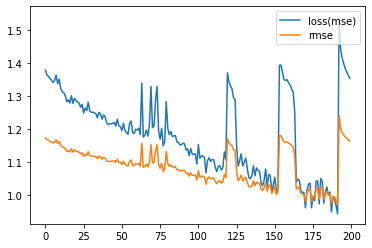

In [ ]:
plt.plot(history.history['loss'], label= 'loss(mse)')
plt.plot(np.sqrt(history.history['mean_squared_error']), label= 'rmse')
plt.legend(loc=1)

In [ ]:
LSTM_prediction = model.predict(X_test)

In [ ]:
LSTM_prediction = LSTM_prediction.clip(0, 20)

submission = pd.DataFrame({'ID': test_df['ID'], 'item_cnt_month': LSTM_prediction.ravel()})
submission.to_csv('/content/drive/My Drive/kaggle/submission6.csv',index=False)

In [ ]:
'''
# check first data in test.csv
check_df = dataset_df[(dataset_df['shop_id']==5) & (dataset_df['item_id']==5037)]
# check_df.plot('date_block_num', 'item_cnt_month')
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
g = sns.factorplot(x='date_block_num', y='item_cnt_month', data=check_df, ax=ax1)
plt.close(g.fig)
g = sns.factorplot(x='date_block_num', y='item_price_month', data=check_df, ax=ax2)
plt.close(g.fig)
'''

"\n# check first data in test.csv\ncheck_df = dataset_df[(dataset_df['shop_id']==5) & (dataset_df['item_id']==5037)]\n# check_df.plot('date_block_num', 'item_cnt_month')\nfig, [ax1, ax2] = plt.subplots(1, 2)\nfig.set_size_inches(12, 4)\ng = sns.factorplot(x='date_block_num', y='item_cnt_month', data=check_df, ax=ax1)\nplt.close(g.fig)\ng = sns.factorplot(x='date_block_num', y='item_price_month', data=check_df, ax=ax2)\nplt.close(g.fig)\n"